In [3]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [4]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/cluster_data/single_shot_harmonic/results.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, beta_syss, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    beta_syss.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
beta_syss = list(beta_syss)
beta_syss.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("beta_syss")
print(beta_syss)
print("times")
print(times)
    

len of inputs:  240000
alphas
[9.99999999999994e-05, 0.00044137931034482665, 0.0007827586206896539, 0.0011241379310344812, 0.0014655172413793102, 0.0018068965517241374, 0.0021482758620689647, 0.002489655172413792, 0.00283103448275862, 0.0031724137931034473, 0.0035137931034482754, 0.0038551724137931027, 0.004196551724137931, 0.004537931034482758, 0.004879310344827585, 0.005220689655172413, 0.005562068965517241, 0.005903448275862069, 0.006244827586206896, 0.006586206896551724, 0.0069275862068965514, 0.007268965517241379, 0.007610344827586207, 0.007951724137931035, 0.008293103448275862, 0.00863448275862069, 0.008975862068965517, 0.009317241379310346, 0.009658620689655173, 0.01]
beta_envs
[1.0, 1.4736842105263157, 1.9473684210526314, 2.4210526315789473, 2.894736842105263, 3.3684210526315788, 3.8421052631578947, 4.315789473684211, 4.789473684210526, 5.263157894736842, 5.7368421052631575, 6.2105263157894735, 6.684210526315789, 7.157894736842105, 7.63157894736842, 8.105263157894736, 8.5789473

len alpha_fixed_params: 5
beta_env, beta_sys, time 1.0 0.0 50.0
alpha, mean_dist =  0.01 ,  0.6386502132794195
alpha, mean_dist =  0.009658620689655173 ,  0.6389601646984906
alpha, mean_dist =  0.009317241379310346 ,  0.6390459950152326
alpha, mean_dist =  0.008975862068965517 ,  0.6392873633927216
alpha, mean_dist =  0.00863448275862069 ,  0.6394516365569795
alpha, mean_dist =  0.008293103448275862 ,  0.6396268672897342
alpha, mean_dist =  0.007951724137931035 ,  0.6397825967259855
alpha, mean_dist =  0.007610344827586207 ,  0.6399562978938328
alpha, mean_dist =  0.007268965517241379 ,  0.6401914152717155
alpha, mean_dist =  0.0069275862068965514 ,  0.6403334981527755
alpha, mean_dist =  0.006586206896551724 ,  0.6405563940806479
alpha, mean_dist =  0.006244827586206896 ,  0.6404804556665402
alpha, mean_dist =  0.005903448275862069 ,  0.6406990833978256
alpha, mean_dist =  0.005562068965517241 ,  0.6409105806949654
alpha, mean_dist =  0.005220689655172413 ,  0.6410064876859921
alpha, 

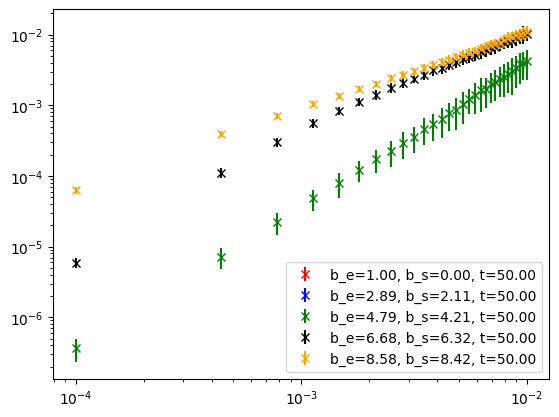

In [11]:

alpha_fixed_params = [(beta_envs[ix], beta_syss[ix], times[0]) for ix in range(0, len(beta_envs), 4)]
print("len alpha_fixed_params:", len(alpha_fixed_params))
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange', 'grey']
color_count = 0
for ( beta_env_0, beta_sys_0, time_0) in alpha_fixed_params:
    print("beta_env, beta_sys, time", beta_env_0, beta_sys_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if beta_sys == beta_sys_0 and beta_env == beta_env_0 and time == time_0:
            x.append(alpha)
            y.append(-original_dist + mean_dist)
            yerr.append(std_dist)

            print("alpha, mean_dist = ", alpha, ", ", mean_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="b_e={:.2f}, b_s={:.2f}, t={:.2f}".format(beta_env_0, beta_sys_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

alpha, beta_env, time 9.99999999999994e-05 1.0 50.0
beta_sys, mean_dist =  0.0 ,  3.7151683518477085e-07
beta_sys, mean_dist =  0.5263157894736842 ,  1.1044798980119896e-06
beta_sys, mean_dist =  1.0526315789473684 ,  9.480580996645838e-08
beta_sys, mean_dist =  1.5789473684210527 ,  1.8565077745114067e-06
beta_sys, mean_dist =  2.1052631578947367 ,  3.272591032887906e-06
beta_sys, mean_dist =  2.631578947368421 ,  4.126662322356811e-06
beta_sys, mean_dist =  3.1578947368421053 ,  4.91622266451941e-06
beta_sys, mean_dist =  3.6842105263157894 ,  5.324103893700194e-06
beta_sys, mean_dist =  4.2105263157894735 ,  5.68159498171017e-06
beta_sys, mean_dist =  4.7368421052631575 ,  5.812429395180008e-06
beta_sys, mean_dist =  5.263157894736842 ,  5.896686570028287e-06
beta_sys, mean_dist =  5.789473684210526 ,  6.041524860833647e-06
beta_sys, mean_dist =  6.315789473684211 ,  5.931868311381816e-06
beta_sys, mean_dist =  6.842105263157895 ,  5.526027106683706e-06
beta_sys, mean_dist =  7.3684

IndexError: list index out of range

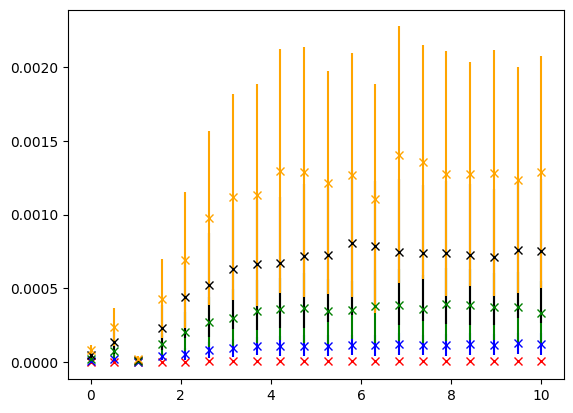

In [7]:
beta_sys_fixed_params = [(alphas[ix], beta_envs[0], times[0]) for ix in range(len(alphas))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for (alpha_0, beta_env_0, time_0) in beta_sys_fixed_params:
    print("alpha, beta_env, time", alpha_0, beta_env_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and beta_env == beta_env_0 and time == time_0:
            x.append(beta_sys)
            y.append(original_dist - mean_dist)
            yerr.append(std_dist)

            print("beta_sys, mean_dist = ", beta_sys, ", ", original_dist - mean_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="a={:.5f}, b_e={:.2f}, t={:.2f}".format(alpha_0, beta_env_0, time_0), color=colors[color_count])
    color_count += 1
# plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
